In [59]:
import csv
import pandas as pd
import os
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy 
plt.rc('font',family='Malgun Gothic')
plt.rc('font',size=10)
warnings.filterwarnings(action='ignore')
from tensorflow.keras.models import load_model

In [60]:
# 빈 데이터 프레임 생성

fm_data_df = pd.DataFrame(columns=['이름','승','무','패','포지션','구단','리그','골/90','도움/90','경기당 팀 득점/90',
                                 '경기당 팀 실점/90', 'Cr C/A', 'FA', '반칙 수/90', '기회 창출/90',
                                 '경기당 유효 슈팅/90', '경기당 슈팅/90', 'Int/90', '달린 거리/90분', 
                                 '공중 A/90', '태클 성공률','경기당 패스 시도/90', '경기당 패스 성공/90', 
                                 'K Ps/90', '태클 성공/90', '드리블 성공/90', 
                                 '헤더 성공/90', 'Cr A/90', '평균획득승점/경기'])

# 모든 데이터 프레임 이어붙이기
fm_data_df = pd.concat([fm_data_df,pd.read_csv('./datas/NEW_FM_DATA_FOR_ML/2021-2022/2021-2022ML.csv',encoding='utf-8-sig')])
fm_data_df = pd.concat([fm_data_df,pd.read_csv('./datas/NEW_FM_DATA_FOR_ML/2022-2023/2022-2023ML.csv',encoding='utf-8-sig')])
fm_data_df = pd.concat([fm_data_df,pd.read_csv('./datas/NEW_FM_DATA_FOR_ML/2023-2024/2023-2024ML.csv',encoding='utf-8-sig')])

fm_data_df = fm_data_df.reset_index(drop=True)

# 데이터 프레임 컬럼명 변경 및 자료형 변경
fm_data_df.rename(columns={'Cr C/A':'크로스 성공률','FA':'파울 획득','Int/90':'인터셉트/90','공중 A/90':'공중볼시도/90','K Ps/90':'키패스/90','Cr A/90':'크로스 시도/90'},inplace=True)
fm_data_df = fm_data_df.astype({'파울 획득':np.int64,'태클 성공률':np.int64})


In [61]:
fm_data_df.head()

,이름,승,무,패,포지션,구단,리그,골/90,도움/90,경기당 팀 득점/90,...,태클 성공률,경기당 패스 시도/90,경기당 패스 성공/90,키패스/90,태클 성공/90,드리블 성공/90,헤더 성공/90,크로스 시도/90,평균획득승점/경기,시즌
0,Branimir Hrgota,7,6,24,공격수,퓌르트,독일 분데스리가,0.404040,0.033670,1.35,...,65,29.19,24.28,0.77,0.55,0.98,4.20,0.67,0.73,2021-2022
1,Håvard Nielsen,6,7,25,공격수,퓌르트,독일 분데스리가,0.332410,0.055402,1.16,...,75,30.69,26.87,0.80,0.53,0.47,7.05,0.86,0.66,2021-2022
2,Adrian Fein,6,6,24,미드필더,퓌르트,독일 분데스리가,0.133879,0.267758,1.27,...,84,52.15,46.86,1.34,1.86,0.23,3.39,0.87,0.67,2021-2022
3,Paul Seguin,7,5,25,미드필더,퓌르트,독일 분데스리가,0.136364,0.054545,1.17,...,81,42.30,38.97,1.45,2.26,0.85,5.75,6.16,0.70,2021-2022
4,Julian Green,7,6,23,미드필더,퓌르트,독일 분데스리가,0.126939,0.063470,0.89,...,89,42.97,38.40,1.02,2.33,0.63,4.94,1.02,0.75,2021-2022


# 과연 포지션별 패스성공률, 90분당 패스시도는 차이가 있을까?

## 시각화

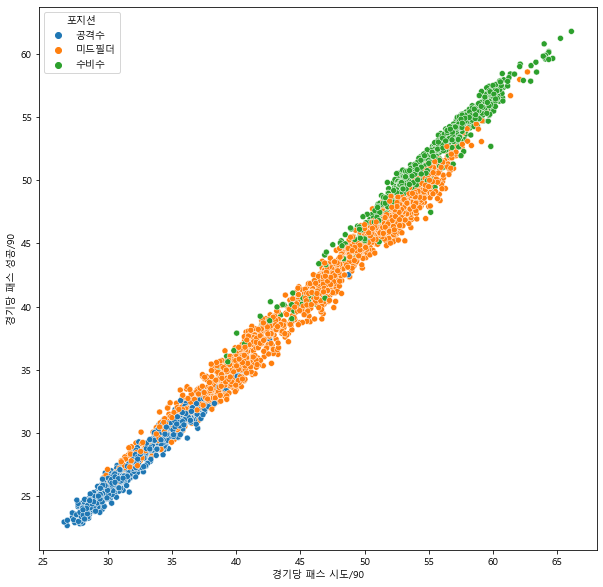

In [62]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=fm_data_df,x='경기당 패스 시도/90',y='경기당 패스 성공/90',hue='포지션')
plt.show()

In [63]:
def position_two_sample_t_test(position1,position2,column):
    return scipy.stats.ttest_ind(fm_data_df[fm_data_df['포지션'] == position1][column],fm_data_df[fm_data_df['포지션'] == position2][column])

## 수비수, 미드필더 간 패스 이표본 T 검정

- 귀무가설: 포지션간 패스기록엔 차이가 없다.
- 대립가설: 포지션간 패스기록엔 차이가 있다.

### 경기당 패스 시도 : 귀무가설 기각 , 수비수와 미드필더간 90분당 패스시도 횟수에 차이가 있다.

In [64]:
position_two_sample_t_test('수비수','미드필더','경기당 패스 시도/90')

Ttest_indResult(statistic=41.0547180312796, pvalue=1.0878884939663545e-287)

### 경기당 패스 성공 : 귀무가설 기각 , 수비수와 미드필더간 90분당 패스성공 횟수에 차이가 있다.

In [65]:
position_two_sample_t_test('수비수','미드필더','경기당 패스 성공/90')

Ttest_indResult(statistic=48.18688763820666, pvalue=0.0)

## 수비수, 공격수 간 패스 이표본 T 검정

- 귀무가설: 포지션간 패스기록엔 차이가 없다.
- 대립가설: 포지션간 패스기록엔 차이가 있다.

### 경기당 패스 시도 : 귀무가설 기각 , 수비수와 공격수간 90분당 패스시도 횟수에 차이가 있다.

In [66]:
position_two_sample_t_test('수비수','공격수','경기당 패스 시도/90')

Ttest_indResult(statistic=131.94956578323593, pvalue=0.0)

### 경기당 패스 성공 : 귀무가설 기각 , 수비수와 공격수간 90분당 패스성공 횟수에 차이가 있다.

In [67]:
position_two_sample_t_test('수비수','공격수','경기당 패스 성공/90')

Ttest_indResult(statistic=136.9231451855654, pvalue=0.0)

## 미드필더, 공격수 간 패스 이표본 T 검정

- 귀무가설: 포지션간 패스기록엔 차이가 없다.
- 대립가설: 포지션간 패스기록엔 차이가 있다.

### 경기당 패스 시도 : 귀무가설 기각 , 미드필더와 공격수간 90분당 패스시도 횟수에 차이가 있다.

In [68]:
position_two_sample_t_test('미드필더','공격수','경기당 패스 시도/90')

Ttest_indResult(statistic=49.85839319858616, pvalue=0.0)

### 경기당 패스 성공 : 귀무가설 기각 , 미드필더와 공격수간 90분당 패스성공 횟수에 차이가 있다.

In [69]:
position_two_sample_t_test('미드필더','공격수','경기당 패스 성공/90')

Ttest_indResult(statistic=50.929326263369326, pvalue=0.0)

# 팀별 실력이 가장 비슷한 리그는 프리미어리그?

- 선수별 경기당 평균획득승점의 분포의 첨도가 가장 낮을것으로 예상

- 결론: 아니다!

- 가장 선수별 실력편차가 큰 리그부터 나열하면 "프랑스 독일 영국 스페인 세리에" 순서

In [70]:
leagues = set(fm_data_df['리그'].unique()) - set(['잉글랜드 프리미어 리그'])
leagues

{'독일 분데스리가', '스페인 프리메라 디비전', '이탈리아 세리에 A', '프랑스 리그 1'}

<Figure size 720x720 with 0 Axes>

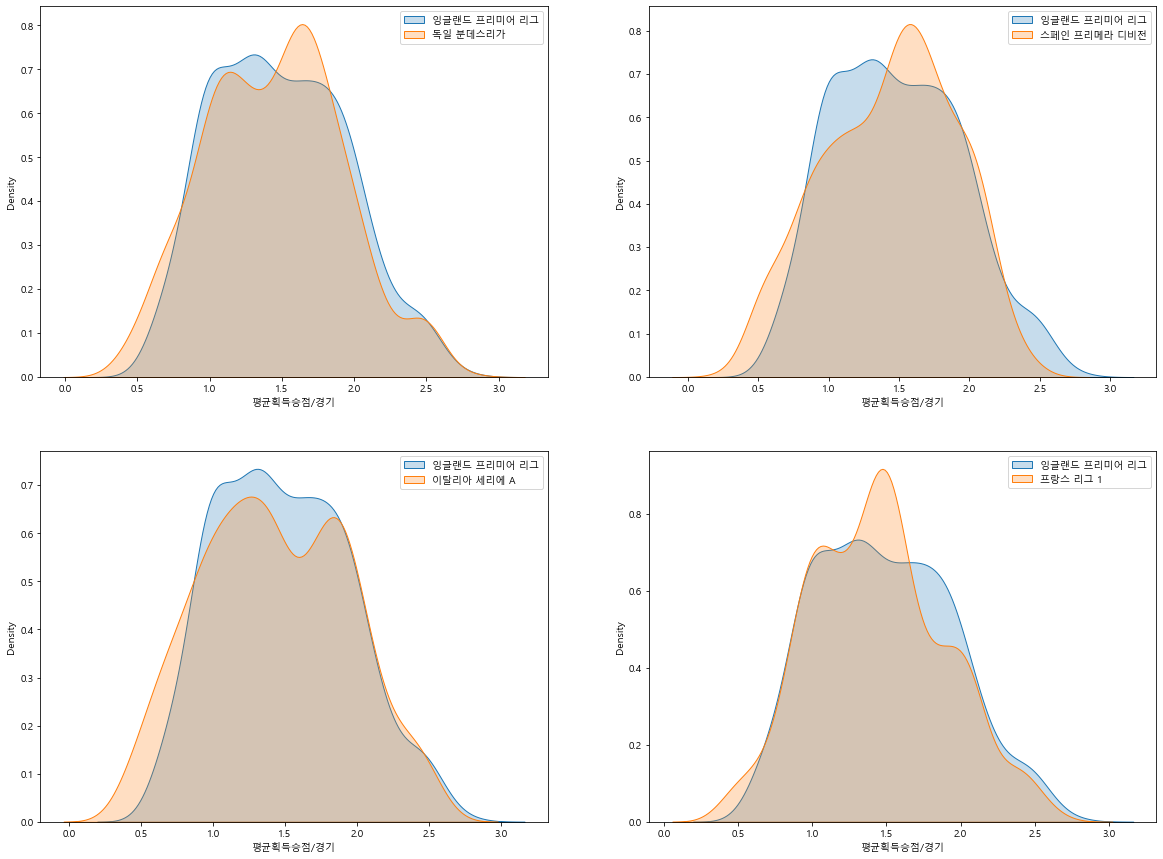

In [71]:
plt.figure(figsize=(10,10))
fig , axes = plt.subplots(2,2,figsize=(20,15))

for i , (ax,league)in enumerate(zip(axes.ravel(),leagues)):
    sns.kdeplot(fm_data_df[fm_data_df['리그']=='잉글랜드 프리미어 리그']['평균획득승점/경기'],shade=True,ax=ax);
    sns.kdeplot(fm_data_df[fm_data_df['리그']==league]['평균획득승점/경기'],shade=True,ax=ax);
    ax.legend(['잉글랜드 프리미어 리그',league])
    
plt.show();

In [72]:
league_kurtosis_dict = {}

for league in fm_data_df['리그'].unique():
    print(f"{league}의 PPG 첨도는? {scipy.stats.kurtosis(fm_data_df[fm_data_df['리그']==league]['평균획득승점/경기'])}")
    league_kurtosis_dict[league] = scipy.stats.kurtosis(fm_data_df[fm_data_df['리그']==league]['평균획득승점/경기'])
    
    
sorted(league_kurtosis_dict.items(),key=lambda x : x[1],reverse=True)

독일 분데스리가의 PPG 첨도는? -0.41364763925912307
스페인 프리메라 디비전의 PPG 첨도는? -0.7669439602990558
프랑스 리그 1의 PPG 첨도는? -0.3883270238562706
잉글랜드 프리미어 리그의 PPG 첨도는? -0.6231787384622836
이탈리아 세리에 A의 PPG 첨도는? -0.8023787943967648


[('프랑스 리그 1', -0.3883270238562706),
 ('독일 분데스리가', -0.41364763925912307),
 ('잉글랜드 프리미어 리그', -0.6231787384622836),
 ('스페인 프리메라 디비전', -0.7669439602990558),
 ('이탈리아 세리에 A', -0.8023787943967648)]

# 21-22시즌 프리미어리그 공격수의 한 골당 생산승점이 가장 많은 선수 TOP5

In [91]:
fm_data_df[fm_data_df['포지션']=='공격수'].sort_values(by='골/90',ascending=False)[['이름','골/90','평균획득승점/경기']].head()

,이름,골/90,평균획득승점/경기
1183,Erling Haaland,0.947075,2.02
1205,Lucas Alario,0.837989,1.77
769,Edinson Cavani,0.836098,1.62
11,Erling Haaland,0.820046,1.88
3410,Duván Zapata,0.797973,1.92


In [95]:
forward_df = fm_data_df[fm_data_df['포지션']=='공격수']
forward_df['골/90'] = forward_df['골/90']+1
forward_df['골/90 승점'] = forward_df['평균획득승점/경기']/forward_df['골/90']
forward_df[forward_df['리그']=='잉글랜드 프리미어 리그'].sort_values(by='골/90 승점',ascending=False)[['이름','골/90','평균획득승점/경기','골/90 승점']].head()

,이름,골/90,평균획득승점/경기,골/90 승점
1935,Phil Foden,1.322829,2.57,1.942806
755,Phil Foden,1.420315,2.50,1.760173
2012,Julian Draxler,1.260417,2.19,1.737521
1924,Ferran Torres,1.436893,2.48,1.725946
756,Riyad Mahrez,1.409889,2.42,1.716447
